# Train the model using the ORCA dataset images

In [ ]:
from orca_train import *

dataset_dir = "../../datasets/ORCA"
model_dir = "../../models"

batch_size = 1
patch_size = (640, 640)
color_model = "LAB"
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size, 
                                shuffle=True,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model,
                                augmentation_strategy="random",
                                start_epoch=1,
                                validation_split=0.2)

# loads our fcn model to continue previous training
#trained_model_version = "Epoch-1_Images-4134_Batch-1"
#trained_model_path="{}/{}".format(model_dir, 'ORCA__Size-{}x{}_{}.pth'.format(patch_size[0], patch_size[1], trained_model_version))
#model = load_checkpoint(file_path=trained_model_path, img_input_size=patch_size, use_cuda=True)

# starts the training from scratch
model = None

# train the model
train_model_with_validation(dataloaders=dataloaders, model=model, n_epochs=100)


2021-04-25 15:31:33,390 :: INFO load_dataset :: [training] ../../datasets/ORCA/training
2021-04-25 15:31:34,531 :: INFO load_dataset :: [training] ../../datasets/ORCA/training
2021-04-25 15:31:36,787 :: INFO load_dataset :: [testing] ../../datasets/ORCA/testing
2021-04-25 15:31:38,222 :: INFO create_dataloader :: Train images (640x640): 3344 augmentation: random
2021-04-25 15:31:38,223 :: INFO create_dataloader :: Valid images (640x640): 837 augmentation: no_augmentation
2021-04-25 15:31:38,225 :: INFO create_dataloader :: Test images (640x640): 4481 augmentation: no_augmentation
2021-04-25 15:31:38,226 :: INFO train_model_with_validation :: Runing on: cpu | GPU available? False
2021-04-25 15:31:38,948 :: INFO train_model_with_validation :: 
2021-04-25 15:31:38,950 :: INFO train_model_with_validation :: --------------------
2021-04-25 15:31:38,952 :: INFO train_model_with_validation :: Epoch 1/100 (0m 0s) 2021-04-25 15:31:38.952707
2021-04-25 15:31:38,956 :: INFO train_model_with_valid

,model,phase,epoch,loss,accuracy,date
50,ORCA__Size-640x640_Epoch-26_Images-3344_Batch-1.pth,train,26,0.287344,0.877754,2021-04-24 12:11:34.522870


,model,phase,epoch,loss,accuracy,date
47,ORCA__Size-640x640_Epoch-24_Images-3344_Batch-1.pth,valid,24,0.289336,0.879671,2021-04-24 09:44:29.921977


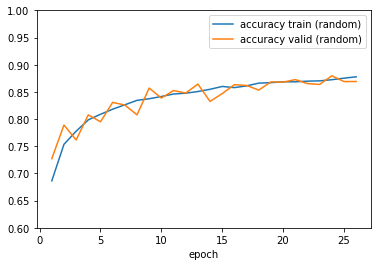

In [10]:
import csv
import pandas as pd 
from IPython.core.display import HTML

training_dir = "../../datasets/ORCA/training"
csv_file_path = "{}/training_loss_random.csv".format(training_dir)
df = pd.read_csv(csv_file_path) 

#train = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'random')]
#valid = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'random')]

train = df[df['phase'] == 'train']
valid = df[df['phase'] == 'valid']


#train_one_by_epoch = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'one_by_epoch')]
#valid_one_by_epoch = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'one_by_epoch')]

#display(HTML(train.tail(10).to_html()))
#display(HTML(valid.tail(10).to_html()))
#print("Train: {} / Valid: {}".format(train['accuracy'].max(), valid['accuracy'].max()))

train_best_accuracy = train[train['accuracy']==train['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))

valid_best_accuracy = valid[valid['accuracy']==valid['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

# Performance Learning Curves: Learning curves calculated on the metric by which the model will be evaluated and selected, e.g. accuracy.
df_accuracy_lines = pd.DataFrame({
    'accuracy train (random)': train['accuracy'].to_numpy(),
    'accuracy valid (random)': valid['accuracy'].to_numpy()},
    #'accuracy train (one_by_epoch)': train_one_by_epoch['accuracy'].to_numpy(),
    #'accuracy valid (one_by_epoch)': valid_one_by_epoch['accuracy'].to_numpy()}, 
    index = train['epoch'])
accuracy_lines = df_accuracy_lines.plot.line(ylim=(0.6,1))#subplots=True)

# Optimization Learning Curves: Learning curves calculated on the metric by which the parameters of the model are being optimized, e.g. loss.
#df_loss_lines = pd.DataFrame({
#    'loss train': train['loss'].to_numpy(),
#    'loss valid': valid['loss'].to_numpy()}, 
#    index = train['epoch'])
#loss_lines = df_loss_lines.plot.line(ylim=(0,1))#subplots=True)




'No augmentation' mean accuracy: 0.8154416918682795


,model,augmentation,phase,epoch,loss,accuracy,date
594,ORCA__Size-640x640_Epoch-98_Images-3344_Batch-1__no_augmentation.pth,no_augmentation,train,98,0.142362,0.94324,2021-05-14 02:49:05.906239


,model,augmentation,phase,epoch,loss,accuracy,date
575,ORCA__Size-640x640_Epoch-88_Images-3344_Batch-1__no_augmentation.pth,no_augmentation,valid,88,0.358785,0.866265,2021-05-13 15:05:23.749177


'One operation by epoch' mean accuracy: 0.8173804686624945


,model,augmentation,phase,epoch,loss,accuracy,date
192,ORCA__Size-640x640_Epoch-97_Images-3344_Batch-1__one_by_epoch.pth,one_by_epoch,train,97,0.186377,0.924033,2021-05-07 10:05:38.159741


,model,augmentation,phase,epoch,loss,accuracy,date
193,ORCA__Size-640x640_Epoch-97_Images-3344_Batch-1__one_by_epoch.pth,one_by_epoch,valid,97,0.336954,0.872429,2021-05-07 10:05:38.159790


'Random composition' mean accuracy: 0.828232167846242


,model,augmentation,phase,epoch,loss,accuracy,date
390,ORCA__Size-640x640_Epoch-96_Images-3344_Batch-1__random.pth,random,train,96,0.223257,0.90962,2021-05-03 16:23:33.492341


,model,augmentation,phase,epoch,loss,accuracy,date
395,ORCA__Size-640x640_Epoch-98_Images-3344_Batch-1__random.pth,random,valid,98,0.316152,0.869859,2021-05-03 18:51:15.019142


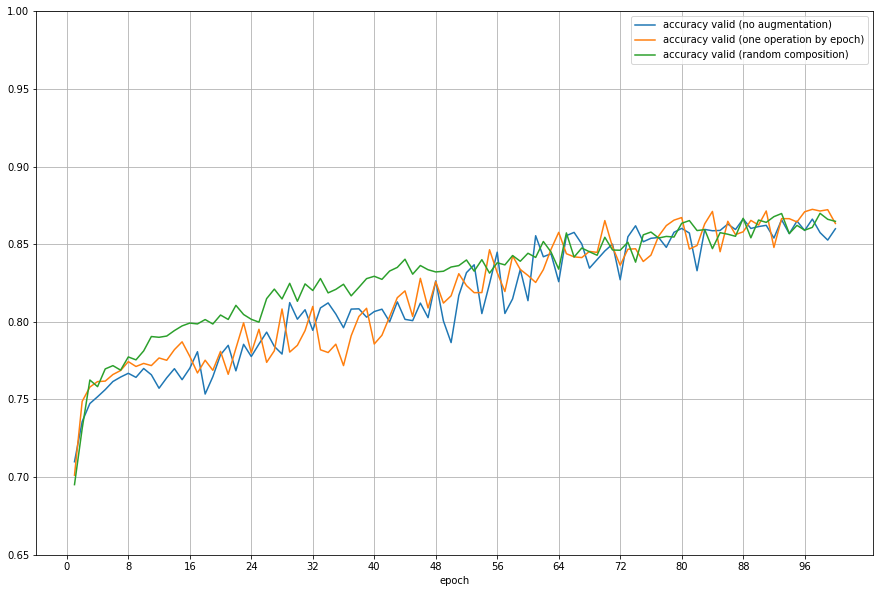

In [10]:
import csv
import pandas as pd 
from IPython.core.display import HTML

training_dir = "../../datasets/ORCA/training"
csv_file_path = "{}/training_loss.csv".format(training_dir)
df = pd.read_csv(csv_file_path) 

train_no_augmentation = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'no_augmentation')]
valid_no_augmentation = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'no_augmentation')]

train_random = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'random')]
valid_random = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'random')]

train_one_by_epoch = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'one_by_epoch')]
valid_one_by_epoch = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'one_by_epoch')]

# Performance Learning Curves: Learning curves calculated on the metric by which the model will be evaluated and selected, e.g. accuracy.
df_accuracy_lines = pd.DataFrame({
    'accuracy train (no augmentation)': train_no_augmentation['accuracy'].to_numpy(),
    'accuracy valid (no augmentation)': valid_no_augmentation['accuracy'].to_numpy(),
    'accuracy train (one operation by epoch)': train_one_by_epoch['accuracy'].to_numpy(),
    'accuracy valid (one operation by epoch)': valid_one_by_epoch['accuracy'].to_numpy(),
    'accuracy train (random composition)': train_random['accuracy'].to_numpy(),
    'accuracy valid (random composition)': valid_random['accuracy'].to_numpy()}, 
    index = train_one_by_epoch['epoch'])
accuracy_lines = df_accuracy_lines.plot.line(ylim=(0.65,1), figsize=(15,10), grid=True, xticks=range(0,100,8))#subplots=True)
#accuracy_lines.get_figure().savefig("{}/plot.png".format(training_dir))
    
print("'No augmentation' mean accuracy: {}".format(valid_no_augmentation['accuracy'].mean()))
train_best_accuracy = train_no_augmentation[train_no_augmentation['accuracy']==train_no_augmentation['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_no_augmentation[valid_no_augmentation['accuracy']==valid_no_augmentation['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

print("'One operation by epoch' mean accuracy: {}".format(valid_one_by_epoch['accuracy'].mean()))
train_best_accuracy = train_one_by_epoch[train_one_by_epoch['accuracy']==train_one_by_epoch['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_one_by_epoch[valid_one_by_epoch['accuracy']==valid_one_by_epoch['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

print("'Random composition' mean accuracy: {}".format(valid_random['accuracy'].mean()))
train_best_accuracy = train_random[train_random['accuracy']==train_random['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_random[valid_random['accuracy']==valid_random['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))



'No augmentation' mean loss: 0.4499672185093146


,model,augmentation,phase,epoch,loss,accuracy,date
400,ORCA__Size-640x640_Epoch-1_Images-3344_Batch-1__no_augmentation.pth,no_augmentation,train,1,0.567334,0.667961,2021-05-08 17:08:24.649400


,model,augmentation,phase,epoch,loss,accuracy,date
435,ORCA__Size-640x640_Epoch-18_Images-3344_Batch-1__no_augmentation.pth,no_augmentation,valid,18,0.581762,0.753496,2021-05-09 14:09:05.185813


'One operation by epoch' mean loss: 0.43895745924211654


,model,augmentation,phase,epoch,loss,accuracy,date
192,ORCA__Size-640x640_Epoch-97_Images-3344_Batch-1__one_by_epoch.pth,one_by_epoch,train,97,0.186377,0.924033,2021-05-07 10:05:38.159741


,model,augmentation,phase,epoch,loss,accuracy,date
191,ORCA__Size-640x640_Epoch-96_Images-3344_Batch-1__one_by_epoch.pth,one_by_epoch,valid,96,0.320615,0.87086,2021-05-07 08:56:00.827537


'Random composition' mean loss: 0.4007654840342844


,model,augmentation,phase,epoch,loss,accuracy,date
390,ORCA__Size-640x640_Epoch-96_Images-3344_Batch-1__random.pth,random,train,96,0.223257,0.90962,2021-05-03 16:23:33.492341


,model,augmentation,phase,epoch,loss,accuracy,date
395,ORCA__Size-640x640_Epoch-98_Images-3344_Batch-1__random.pth,random,valid,98,0.316152,0.869859,2021-05-03 18:51:15.019142


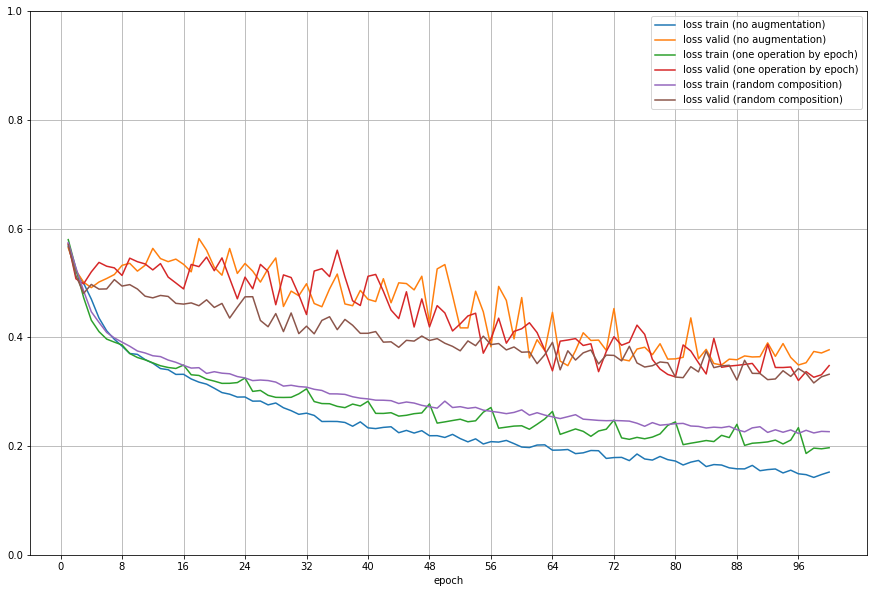

In [4]:
import csv
import pandas as pd 
from IPython.core.display import HTML

training_dir = "../../datasets/ORCA/training"
csv_file_path = "{}/training_loss.csv".format(training_dir)
df = pd.read_csv(csv_file_path) 

train_no_augmentation = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'no_augmentation')]
valid_no_augmentation = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'no_augmentation')]

train_random = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'random')]
valid_random = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'random')]

train_one_by_epoch = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'one_by_epoch')]
valid_one_by_epoch = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'one_by_epoch')]

# Optimization Learning Curves: Learning curves calculated on the metric by which the parameters of the model are being optimized, e.g. loss.
df_accuracy_lines = pd.DataFrame({
    'loss train (no augmentation)': train_no_augmentation['loss'].to_numpy(),
    'loss valid (no augmentation)': valid_no_augmentation['loss'].to_numpy(),
    'loss train (one operation by epoch)': train_one_by_epoch['loss'].to_numpy(),
    'loss valid (one operation by epoch)': valid_one_by_epoch['loss'].to_numpy(),
    'loss train (random composition)': train_random['loss'].to_numpy(),
    'loss valid (random composition)': valid_random['loss'].to_numpy()}, 
    index = train_one_by_epoch['epoch'])
accuracy_lines = df_accuracy_lines.plot.line(ylim=(0,1), figsize=(15,10), grid=True, xticks=range(0,100,8))#subplots=True)

print("'No augmentation' mean loss: {}".format(valid_no_augmentation['loss'].mean()))
train_best_accuracy = train_no_augmentation[train_no_augmentation['loss']==train_no_augmentation['loss'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_no_augmentation[valid_no_augmentation['loss']==valid_no_augmentation['loss'].max()]
display(HTML(valid_best_accuracy.to_html()))

print("'One operation by epoch' mean loss: {}".format(valid_one_by_epoch['loss'].mean()))
train_best_loss = train_one_by_epoch[train_one_by_epoch['loss']==train_one_by_epoch['loss'].min()]
display(HTML(train_best_loss.to_html()))
valid_best_loss = valid_one_by_epoch[valid_one_by_epoch['loss']==valid_one_by_epoch['loss'].min()]
display(HTML(valid_best_loss.to_html()))

print("'Random composition' mean loss: {}".format(valid_random['loss'].mean()))
train_best_loss = train_random[train_random['loss']==train_random['loss'].min()]
display(HTML(train_best_loss.to_html()))
valid_best_loss = valid_random[valid_random['loss']==valid_random['loss'].min()]
display(HTML(valid_best_loss.to_html()))



In [65]:

display(HTML(train.head(30).to_html()))
display(HTML(valid.head(30).to_html()))
print("Train: {} / Valid: {}".format(train['accuracy'].max(), valid['accuracy'].max()))

,model,phase,epoch,loss,accuracy,date
0,ORCA__Size-640x640_Epoch-1_Images-3344_Batch-1__one_by_epoch.pth,train,1,0.528563,0.710017,2021-04-26 08:28:17.283887
2,ORCA__Size-640x640_Epoch-2_Images-3344_Batch-1__one_by_epoch.pth,train,2,0.447186,0.776678,2021-04-26 09:38:10.574573
4,ORCA__Size-640x640_Epoch-3_Images-3344_Batch-1__one_by_epoch.pth,train,3,0.398132,0.811535,2021-04-26 10:48:12.380302
6,ORCA__Size-640x640_Epoch-4_Images-3344_Batch-1__one_by_epoch.pth,train,4,0.377871,0.823986,2021-04-26 11:58:24.397851
8,ORCA__Size-640x640_Epoch-5_Images-3344_Batch-1__one_by_epoch.pth,train,5,0.365391,0.831534,2021-04-26 13:09:00.868658
10,ORCA__Size-640x640_Epoch-6_Images-3344_Batch-1__one_by_epoch.pth,train,6,0.356415,0.836221,2021-04-26 14:25:20.337562
12,ORCA__Size-640x640_Epoch-7_Images-3344_Batch-1__one_by_epoch.pth,train,7,0.352534,0.842034,2021-04-26 15:36:10.455458
14,ORCA__Size-640x640_Epoch-8_Images-3344_Batch-1__one_by_epoch.pth,train,8,0.350505,0.842558,2021-04-26 16:46:44.301828
16,ORCA__Size-640x640_Epoch-9_Images-3344_Batch-1__one_by_epoch.pth,train,9,0.325173,0.856649,2021-04-26 17:58:09.884735
18,ORCA__Size-640x640_Epoch-10_Images-3344_Batch-1__one_by_epoch.pth,train,10,0.325524,0.853693,2021-04-26 19:10:51.922353


,model,phase,epoch,loss,accuracy,date
1,ORCA__Size-640x640_Epoch-1_Images-3344_Batch-1__one_by_epoch.pth,valid,1,0.448697,0.781162,2021-04-26 08:28:17.283915
3,ORCA__Size-640x640_Epoch-2_Images-3344_Batch-1__one_by_epoch.pth,valid,2,0.421368,0.794140,2021-04-26 09:38:10.574599
5,ORCA__Size-640x640_Epoch-3_Images-3344_Batch-1__one_by_epoch.pth,valid,3,0.385342,0.822218,2021-04-26 10:48:12.380327
7,ORCA__Size-640x640_Epoch-4_Images-3344_Batch-1__one_by_epoch.pth,valid,4,0.379938,0.823500,2021-04-26 11:58:24.397877
9,ORCA__Size-640x640_Epoch-5_Images-3344_Batch-1__one_by_epoch.pth,valid,5,0.376023,0.821920,2021-04-26 13:09:00.868683
11,ORCA__Size-640x640_Epoch-6_Images-3344_Batch-1__one_by_epoch.pth,valid,6,0.347624,0.849614,2021-04-26 14:25:20.337628
13,ORCA__Size-640x640_Epoch-7_Images-3344_Batch-1__one_by_epoch.pth,valid,7,0.393848,0.810097,2021-04-26 15:36:10.455499
15,ORCA__Size-640x640_Epoch-8_Images-3344_Batch-1__one_by_epoch.pth,valid,8,0.334074,0.847681,2021-04-26 16:46:44.301889
17,ORCA__Size-640x640_Epoch-9_Images-3344_Batch-1__one_by_epoch.pth,valid,9,0.501459,0.754437,2021-04-26 17:58:09.884780
19,ORCA__Size-640x640_Epoch-10_Images-3344_Batch-1__one_by_epoch.pth,valid,10,0.323741,0.858999,2021-04-26 19:10:51.922378


Train: 0.8782523006457491 / Valid: 0.8826956741898152


'No augmentation' mean accuracy: 0.8860691970825195


,model,augmentation,phase,epoch,loss,accuracy,date
996,ORCA__Size-512x512_Epoch-247_Images-80_Batch-1__no_augmentation.pth,no_augmentation,train,499,0.054914,0.976363,2021-05-31 17:01:32.474577


,model,augmentation,phase,epoch,loss,accuracy,date
493,ORCA__Size-512x512_Epoch-247_Images-80_Batch-1__no_augmentation.pth,no_augmentation,valid,247,0.508546,0.894928,2021-05-31 12:35:40.420015


'One operation by epoch' mean accuracy: 0.888682427597046


,model,augmentation,phase,epoch,loss,accuracy,date
1960,ORCA__Size-512x512_Epoch-352_Images-80_Batch-1__one_by_epoch.pth,one_by_epoch,train,481,0.103206,0.956689,2021-06-01 02:25:27.847642


,model,augmentation,phase,epoch,loss,accuracy,date
1703,ORCA__Size-512x512_Epoch-352_Images-80_Batch-1__one_by_epoch.pth,one_by_epoch,valid,352,0.246034,0.904016,2021-06-01 00:06:56.550533


'Random composition' mean accuracy: 0.8801742057800293


,model,augmentation,phase,epoch,loss,accuracy,date
2918,ORCA__Size-512x512_Epoch-384_Images-80_Batch-1__random.pth,random,train,460,0.147911,0.936979,2021-06-02 03:08:21.407032


,model,augmentation,phase,epoch,loss,accuracy,date
2767,ORCA__Size-512x512_Epoch-384_Images-80_Batch-1__random.pth,random,valid,384,0.244402,0.904374,2021-06-02 01:43:21.213710


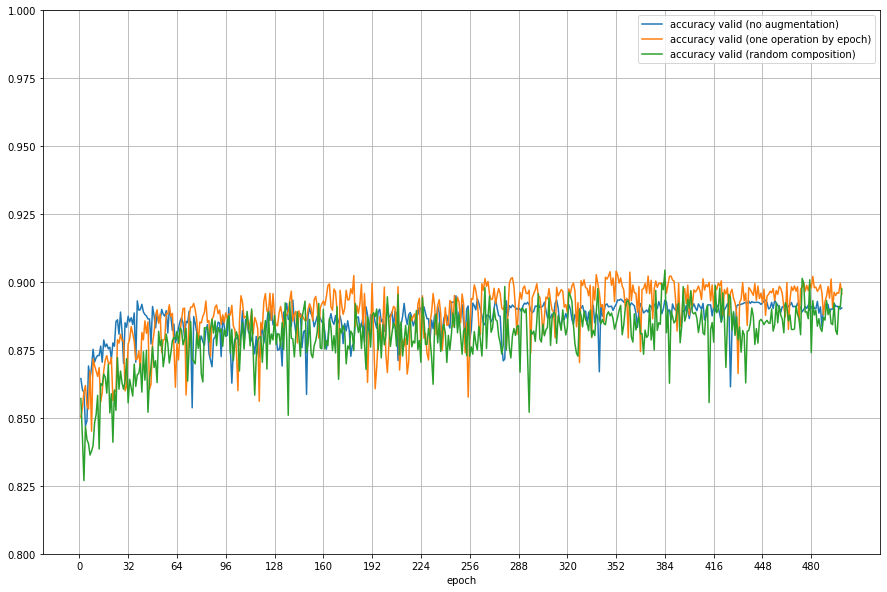

In [13]:
import csv
import pandas as pd 
from IPython.core.display import HTML

training_dir = "../../datasets/ORCA_512x512/training"
csv_file_path = "{}/training_loss_512x512.csv".format(training_dir)
df = pd.read_csv(csv_file_path) 

train_no_augmentation = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'no_augmentation')]
valid_no_augmentation = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'no_augmentation')]

train_random = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'random')]
valid_random = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'random')]

train_one_by_epoch = df.loc[(df['phase'] == 'train') & (df['augmentation'] == 'one_by_epoch')]
valid_one_by_epoch = df.loc[(df['phase'] == 'valid') & (df['augmentation'] == 'one_by_epoch')]

# Performance Learning Curves: Learning curves calculated on the metric by which the model will be evaluated and selected, e.g. accuracy.
df_accuracy_lines = pd.DataFrame({
    'accuracy train (no augmentation)': train_no_augmentation['accuracy'].to_numpy(),
    'accuracy valid (no augmentation)': valid_no_augmentation['accuracy'].to_numpy(),
    'accuracy train (one operation by epoch)': train_one_by_epoch['accuracy'].to_numpy(),
    'accuracy valid (one operation by epoch)': valid_one_by_epoch['accuracy'].to_numpy(),
    'accuracy train (random composition)': train_random['accuracy'].to_numpy(),
    'accuracy valid (random composition)': valid_random['accuracy'].to_numpy()}, 
    index = train_one_by_epoch['epoch'])
accuracy_lines = df_accuracy_lines.plot.line(ylim=(0.8,1), figsize=(15,10), grid=True, xticks=range(0,500,32))#subplots=True)
#accuracy_lines.get_figure().savefig("{}/plot.png".format(training_dir))

print("'No augmentation' mean accuracy: {}".format(valid_no_augmentation['accuracy'].mean()))
train_best_accuracy = train_no_augmentation[train_no_augmentation['accuracy']==train_no_augmentation['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_no_augmentation[valid_no_augmentation['accuracy']==valid_no_augmentation['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

print("'One operation by epoch' mean accuracy: {}".format(valid_one_by_epoch['accuracy'].mean()))
train_best_accuracy = train_one_by_epoch[train_one_by_epoch['accuracy']==train_one_by_epoch['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_one_by_epoch[valid_one_by_epoch['accuracy']==valid_one_by_epoch['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

print("'Random composition' mean accuracy: {}".format(valid_random['accuracy'].mean()))
train_best_accuracy = train_random[train_random['accuracy']==train_random['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))
valid_best_accuracy = valid_random[valid_random['accuracy']==valid_random['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

